<a href="https://colab.research.google.com/github/SaksinD/Twiter_Stock_Market_Analysis/blob/main/Twitter%20stock%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Stock Market Analysis using Python

* Twitter started its journey in the stock market in 2013. So to analyze the complete timeline of Twitter in the stock market, we need the stock price data of Twitter from 2013 to 2023.

* Now let’s start with the task of Twitter Stock Market Analysis by importing the necessary Python libraries and the dataset.

In [1]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

data = pd.read_csv("TWTR.csv")
print(data.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1  2013-11-08  45.930000  46.939999  40.685001  41.650002  41.650002   
2  2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3  2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4  2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

        Volume  
0  117701670.0  
1   27925307.0  
2   16113941.0  
3    6316755.0  
4    8688325.0  


In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2264 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 123.9+ KB
None


* The Date column is an object in this dataset. We will convert it into a datetime data type later.
* Now, let’s have a look at whether this dataset contains any null values or not :

In [3]:
print(data.isnull().sum())

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64


* There are five null values in each column except the date column.
* Let’s remove the rows with null values and move further:

In [4]:
data = data.dropna()

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2259.0,3.602029e+01,1.411846e+01,13.950,2.555000e+01,3.542000e+01,4.420500e+01,7.836000e+01
High,2259.0,3.669988e+01,1.437206e+01,14.220,2.621500e+01,3.610000e+01,4.501500e+01,8.075000e+01
Low,2259.0,3.533946e+01,1.382872e+01,13.725,2.491250e+01,3.482000e+01,4.332750e+01,7.605000e+01
Close,2259.0,3.600363e+01,1.408999e+01,14.010,2.541000e+01,3.549000e+01,4.413500e+01,7.763000e+01
Adj Close,2259.0,3.600363e+01,1.408999e+01,14.010,2.541000e+01,3.549000e+01,4.413500e+01,7.763000e+01
Volume,2259.0,2.175186e+07,1.909988e+07,0.000,1.233530e+07,1.691305e+07,2.428082e+07,2.692131e+08
Year,2259.0,2.017840e+03,2.600503e+00,2013.000,2.016000e+03,2.018000e+03,2.020000e+03,2.022000e+03
Month,2259.0,6.535193e+00,3.423978e+00,1.000,4.000000e+00,7.000000e+00,9.500000e+00,1.200000e+01


* Now let’s have a look at the stock prices of Twitter over the years:

In [5]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"],
                                        high=data["High"],
                                        low=data["Low"],
                                        close=data["Close"])])
figure.update_layout(title = "Twitter Stock Prices Over the Years",
                     xaxis_rangeslider_visible=False)
figure.show()

* So since the introduction of Twitter in the stock market, it was only profitable at the beginning and 2021. Let’s visualize a bar chart to analyze the stock prices of Twitter in detail:

In [6]:
figure = px.bar(data,
                x = "Date",
                y= "Close",
                color="Close")
figure.update_xaxes(rangeslider_visible=True)
figure.show()

* The above graph shows the stock prices of Twitter over the years. You can use the range slider below to zoom into a particular time period. Look at the image as an example.

*Using the range slider, we can see that the first quarter of 2021 was the best time period for Twitter over the years in the stock market.
* We can also assign buttons to control time periods.
* Let’s add buttons to analyze the stock prices of Twitter in different time periods:

In [7]:
figure = px.bar(data, x = "Date", y= "Close", color="Close")
figure.update_xaxes(rangeslider_visible=True)
figure.update_layout(title = "Twitter Stock Prices Over the Years",
                     xaxis_rangeslider_visible=False)
figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

* The buttons in the visualization above will help you understand the stock prices of Twitter at different time periods.

* Now let’s have a look at the complete timeline of Twitter in the stock market:

In [8]:
data["Date"] = pd.to_datetime(data["Date"],
                              format = '%Y-%m-%d')
data['Year'] = data['Date'].dt.year
data["Month"] = data["Date"].dt.month
fig = px.line(data,
              x="Month",
              y="Close",
              color='Year',
              title="Complete Timeline of Twitter")
fig.show()

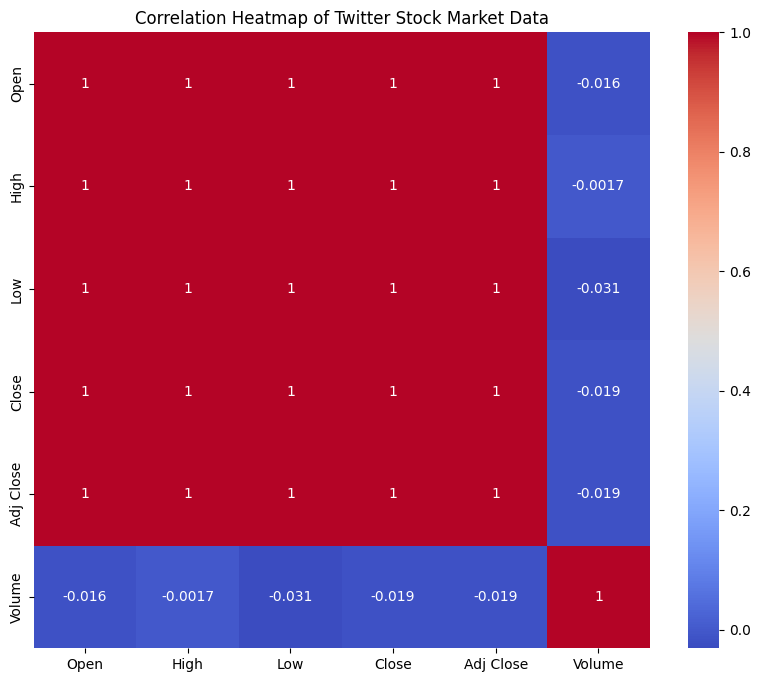

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Twitter Stock Market Data')
plt.show()

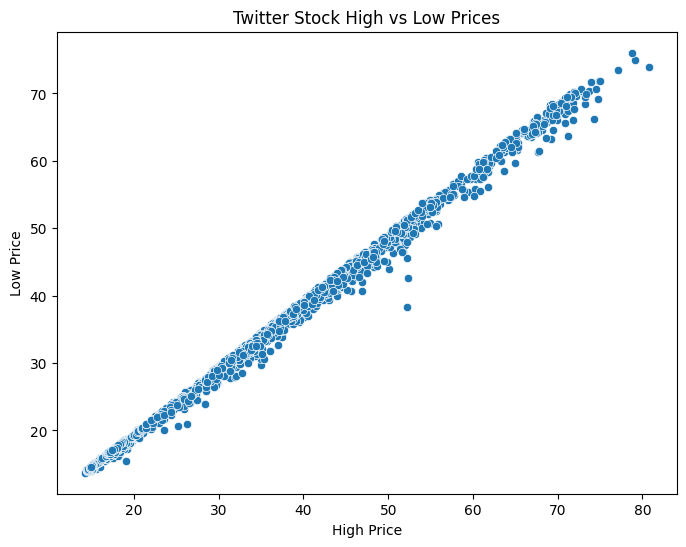

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='High', y='Low', data=data)
plt.title('Twitter Stock High vs Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.show()

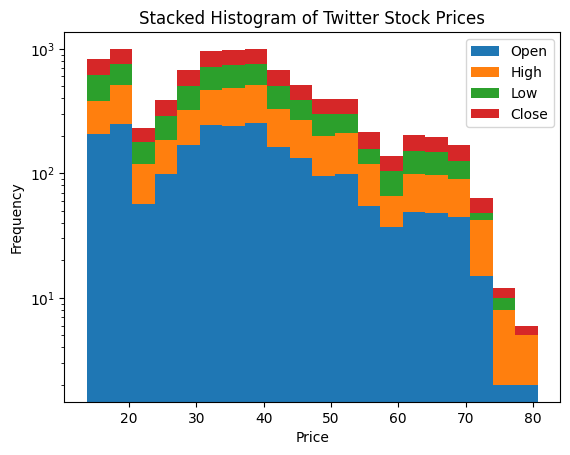

In [18]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.hist([data['Open'], data['High'], data['Low'], data['Close']], bins=20, stacked=True, label=['Open', 'High', 'Low', 'Close'])
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.set_title('Stacked Histogram of Twitter Stock Prices')
ax.legend()
plt.show()

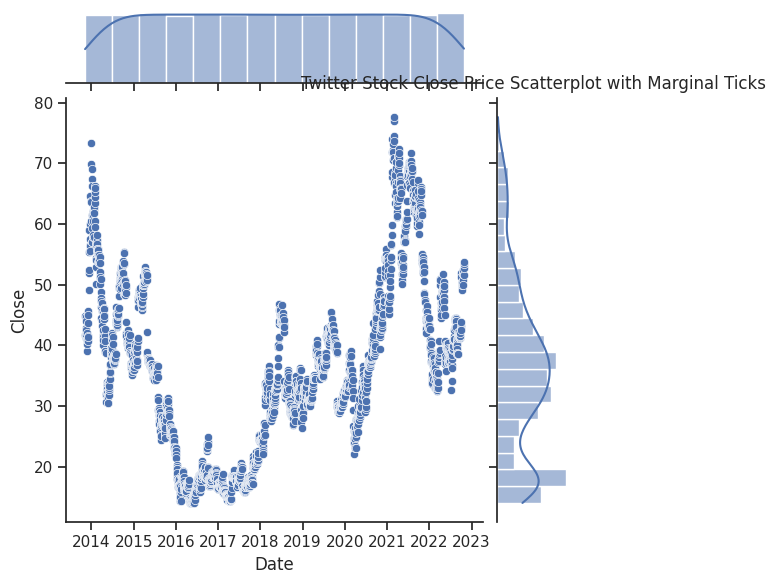

In [20]:
sns.set(style="ticks")
g = sns.JointGrid(data=data, x='Date', y='Close', height=6, ratio=5)
g.plot_joint(sns.scatterplot, color='b')
g.plot_marginals(sns.histplot, kde=True, color='b')
plt.xticks(rotation=45, ha='right')
plt.title('Twitter Stock Close Price Scatterplot with Marginal Ticks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

*******************************************************
So since the introduction of Twitter in the stock market, 2014 went well for Twitter in the first four years. 2016 and 2017 were the worst for Twitter in the stock market. Its stock prices went up in 2018, 2019, and 2020. And then came 2021, the best year for Twitter in the stock market. Twitter reached its highest-ever stock price in the year 2021. But the stock prices of Twitter went down again in 2022.